**Clasificación de imágenes de animales**

In [14]:
# Importamos las librerias necesarias
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [15]:
# Cargamos un dataset de prueba de la librería de keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print("Son", X_train.shape[0], "imágenes de tamaño", X_train.shape[1], "x", X_train.shape[2], "píxeles")

# Convertimos los target en una variable categorizada (one hot encoder)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Existen", y_train.shape[1], "categorias target")

# Hacemos un reshape para que encaje en el modelo especificando que son imágenes con solo una capa de píxeles en blanco y negro
X_train = X_train[:,:,:,None]
X_test = X_test[:,:,:,None]

# Separamos la muestra de training en training y validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

Son 60000 imágenes de tamaño 28 x 28 píxeles
Existen 10 categorias target


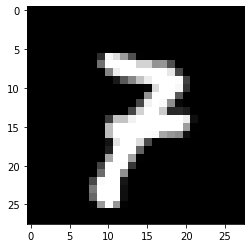

In [16]:
# Mostramos un ejemplo de cómo son las imágenes
plt.imshow(X_train[0],cmap="gray")

In [17]:
# Creamos el modelo añadiendo cada capa
model = Sequential(name="10C_Classifier")

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilamos empleando el accuracy para medir el funcionamiento del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2022-01-26 17:54:37.557723: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Mostramos un resumen de nuestro modelo
model.summary()

Model: "10C_Classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Creamos un callback para guardar el mejor modelo
best_model_callback = ModelCheckpoint("best_models/best_model_animals.h5",
                                                monitor='val_accuracy',
                                                save_best_only=True)

# Creamos un callback para parar de entrenear si la variable a monitorizar no mejora más de un 0.01 en 2 epochs 
early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, 
                                            verbose=1, mode='auto')

# Entrenamos el modelo
hist = model.fit(X_train, y_train,
                 validation_data=(X_val, y_val), 
                 epochs=5,        # epoch: número de veces que verá todos los datos
                 batch_size=128, # batch: número de datos que ve por pasada
                 callbacks=[early_stopping_callback, best_model_callback],
                 verbose=1)


Epoch 1/5
329/329 [==============================] - 40s 123ms/step - loss: 0.0472 - accuracy: 0.9859 - val_loss: 0.1054 - val_accuracy: 0.9735
Epoch 2/5
329/329 [==============================] - 42s 127ms/step - loss: 0.0317 - accuracy: 0.9890 - val_loss: 0.1027 - val_accuracy: 0.9752
Epoch 3/5
329/329 [==============================] - 42s 129ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.1285 - val_accuracy: 0.9731
Epoch 4/5
329/329 [==============================] - 43s 129ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.1687 - val_accuracy: 0.9712
Epoch 5/5
329/329 [==============================] - 43s 131ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.1512 - val_accuracy: 0.9763


In [22]:
# Evaluamos el modelo con el dataset de test
score = model.evaluate(X_test,y_test)
score

313/313 [==============================] - 2s 8ms/step - loss: 0.1321 - accuracy: 0.9761


[0.1320914328098297, 0.9761000275611877]

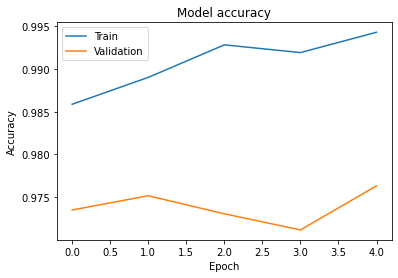

In [23]:
# Mostramos el accuracy en validación y test para las epochs
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
# Empleamos el modelo para predecir
preds_test = model.predict(X_test)
preds_test.shape

(10000, 10)

['p(y=0|x) = 0.0000', 'p(y=1|x) = 0.0000', 'p(y=2|x) = 1.0000', 'p(y=3|x) = 0.0000', 'p(y=4|x) = 0.0000', 'p(y=5|x) = 0.0000', 'p(y=6|x) = 0.0000', 'p(y=7|x) = 0.0000', 'p(y=8|x) = 0.0000', 'p(y=9|x) = 0.0000']


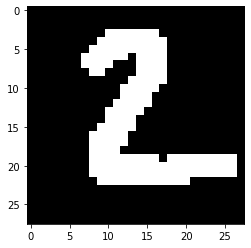

In [25]:
# Comprobamos la predicción para un dato en específico
idx_mostrar = 1 # Cambiar
plt.imshow(X_test[idx_mostrar,:,:,0],cmap="gray",vmin=0,vmax=1)
print(["p(y=%d|x) = %.4f"%(i,p) for i,p in enumerate(preds_test[idx_mostrar])])